<a href="https://colab.research.google.com/github/nneguss1/DATA-690-WANG/blob/master/Assignment_07/Data690_Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# <1> 
# Import libraries

#(Write code here)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import fnmatch
import re

In [ ]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
cwd = os.getcwd()
#if I want to change the working directory to my personal desktop
#os.chdir('/Users/neftalemnegussie/Desktop/DATA_690/CollegeScorecard_Raw_Data')
cwd

'/content'

In [ ]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
# The path for listing items
path = '/content/drive/My Drive/Colab Notebooks'
data_files = os.listdir(path)
# List of files in complete directory
file_list = []
 
for path, folders, files in os.walk(path):
    for file in files:
        if fnmatch.fnmatch(file, '*MERGED*'):
            file_list.append(os.path.join(path, file))
 
# Loop to print each filename separately
#for filename in file_list:
#   print(filename)
print(file_list)
np.size(file_list)


['/content/drive/My Drive/Colab Notebooks/MERGED1996_97_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1997_98_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1998_99_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1999_00_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2000_01_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2001_02_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2002_03_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2003_04_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2004_05_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2005_06_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2006_07_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2007_08_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2008_09_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2009_10_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2010_11_PP.csv', '/content/drive/My Drive/Colab Notebook

23

In [ ]:
print(file_list)

['/content/drive/My Drive/Colab Notebooks/MERGED1996_97_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1997_98_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1998_99_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED1999_00_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2000_01_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2001_02_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2002_03_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2003_04_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2004_05_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2005_06_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2006_07_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2007_08_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2008_09_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2009_10_PP.csv', '/content/drive/My Drive/Colab Notebooks/MERGED2010_11_PP.csv', '/content/drive/My Drive/Colab Notebook

In [ ]:
import re
DF_List = []
for f in file_list:
  matchObj = re.match( r'(.*)/MERGED(\d{4})', f, re.M|re.I)
  DF_List.append(pd.read_csv(f, usecols=['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN']).assign(YEAR = matchObj.group(2)))
dfFinal = pd.concat(DF_List)
  
len(DF_List)
dfFinal.head()



,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [ ]:
dfFinal.shape

(163331, 7)

**Explore the new database (dfFinal)**

In [ ]:
dfFinal.tail()
dfFinal.sample(10)
dfFinal['TUITIONFEE_IN'].describe()

count    79194.000000
mean     11665.505367
std       9985.998016
min          0.000000
25%       3776.000000
50%       9285.000000
75%      16146.000000
max      74787.000000
Name: TUITIONFEE_IN, dtype: float64

**The dataframe contains many years of data of all U.S. colleges.Let's just look at UMBC. Filter/query the dataframe to retrieve only rows that belong to UMBC. Save the UMBC data to a new data frame using a new variable so that the old big data frame is still available for later use.**

In [ ]:
Select_UMBC = dfFinal[dfFinal.INSTNM == 'University of Maryland-Baltimore County']
Select_UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


**Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)**

In [ ]:
Select_UMBC[['ADM_RATE','TUITIONFEE_IN']].describe()

,ADM_RATE,TUITIONFEE_IN
count,18.000000,19.000000
mean,0.640694,9004.842105
std,0.052728,1825.795421
min,0.568300,5490.000000
25%,0.597600,8270.000000
50%,0.632100,8872.000000
75%,0.689375,10226.000000
max,0.717400,11778.000000


In [ ]:
Select_UMBC.shape

(23, 7)

In [ ]:
Select_UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [ ]:
Select_UMBC.sample(4)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996


**Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart**

<Figure size 2880x720 with 0 Axes>

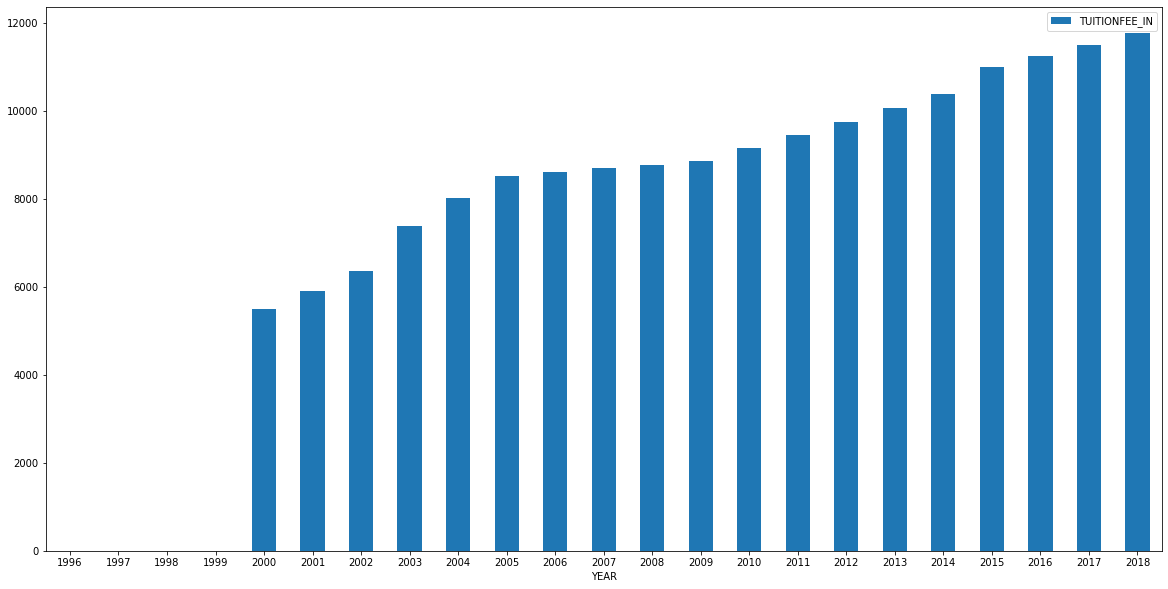

In [ ]:
plt.figure(figsize=(40,10))
ax = Select_UMBC.plot.bar(x='YEAR', y='TUITIONFEE_IN', rot=0, figsize =(20,10))

**Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart**

([<matplotlib.axis.XTick at 0x7fa29fd637f0>,
 [Text(0, 0, '1996'),
  Text(0, 0, '1997'),
  Text(0, 0, '1998'),
  Text(0, 0, '1999'),
  Text(0, 0, '2000'),
  Text(0, 0, '2001'),
  Text(0, 0, '2002'),
  Text(0, 0, '2003'),
  Text(0, 0, '2004'),
  Text(0, 0, '2005'),
  Text(0, 0, '2006'),
  Text(0, 0, '2007'),
  Text(0, 0, '2008'),
  Text(0, 0, '2009'),
  Text(0, 0, '2010'),
  Text(0, 0, '2011'),
  Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018')])

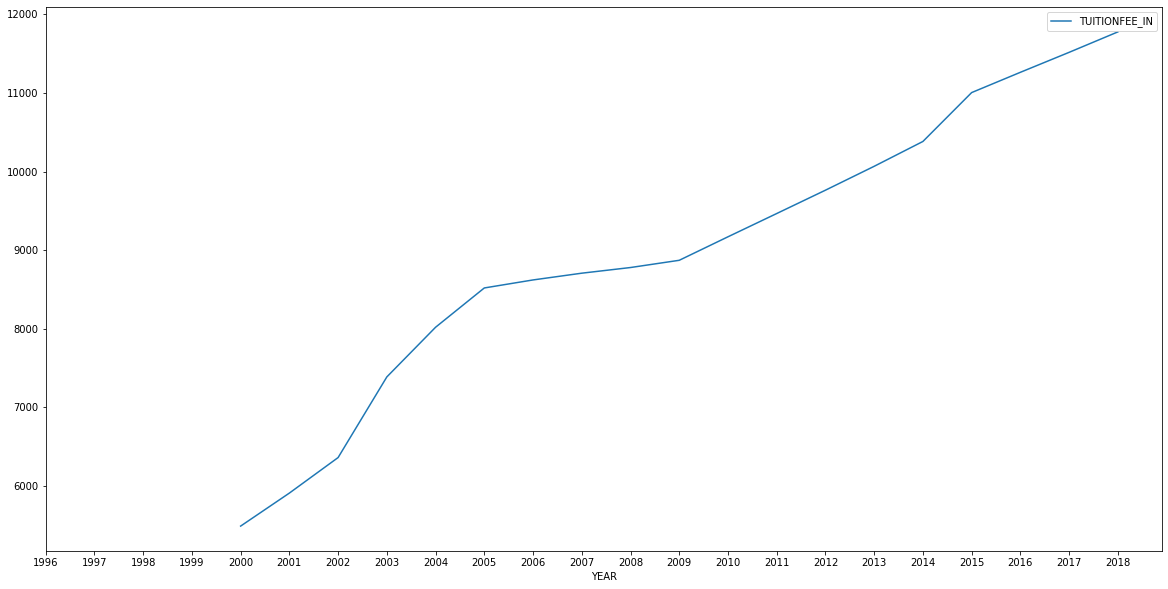

In [ ]:
ay = Select_UMBC.plot.line(x='YEAR', y='TUITIONFEE_IN', rot=0, figsize =(20,10))
plt.xticks(np.arange(len(Select_UMBC.YEAR)), Select_UMBC.YEAR)

**Now let's look at the tuition growth rate year over year. We need to calculate UMBC tuition change percentage each year. First convert the TUITIONFEE_IN column to a Python List.**

In [ ]:
Select_UMBC['TUITIONFEE_IN'].dtypes

dtype('float64')

In [ ]:
UMBC_tuition = Select_UMBC['TUITIONFEE_IN'].to_list()
print(UMBC_tuition)


[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0]


**Loop through the list and calculate the % change each year over the prior year. Also round the numbers to 3 decimal places.**

In [ ]:
Percent_UMBC = []
for val in range(len(UMBC_tuition)):
  pc = (float((UMBC_tuition[val]-UMBC_tuition[val- int(1)])/UMBC_tuition[val-int(1)]))*100
  pc_round = round(pc,3)
  Percent_UMBC.append(pc_round)

print(Percent_UMBC)

  

[nan, nan, nan, nan, nan, 7.65, 7.648, 16.127, 8.554, 6.234, 1.197, 0.997, 0.827, 1.048, 3.37, 3.228, 3.137, 3.113, 3.139, 5.99, 2.344, 2.255, 2.257]


**Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")**

In [ ]:
Select_UMBC['PCT_CHANGE'] = Percent_UMBC
Select_UMBC

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.650
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.648
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.127
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.554
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.234


**Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart**

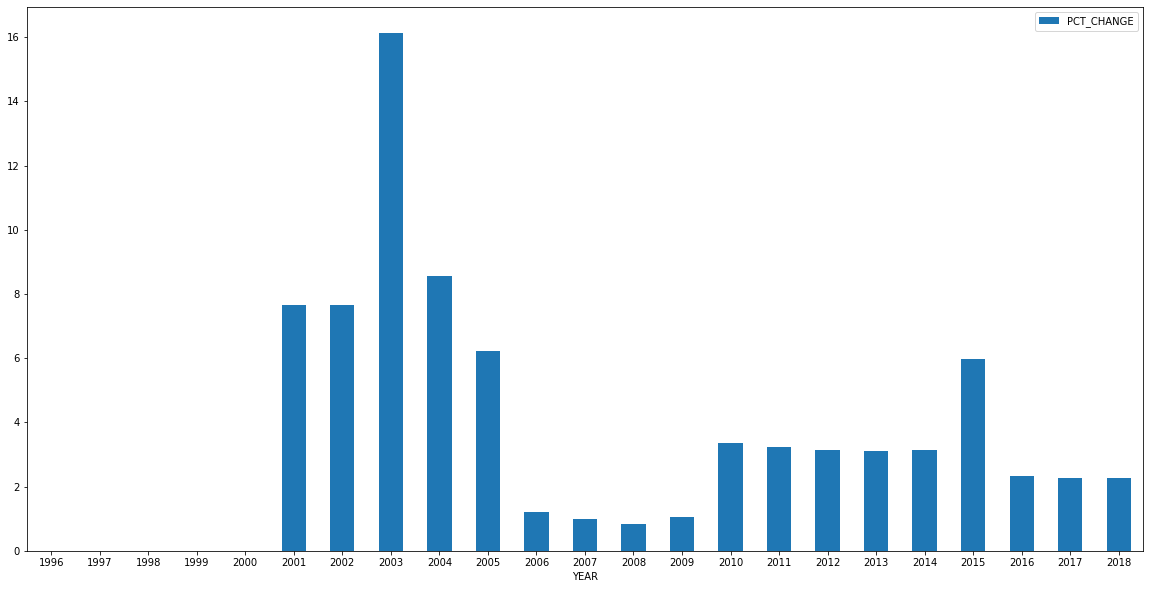

In [ ]:
ax_NEW = Select_UMBC.plot.bar(x='YEAR', y='PCT_CHANGE', rot=0, figsize =(20,10))

**LINE CHART**

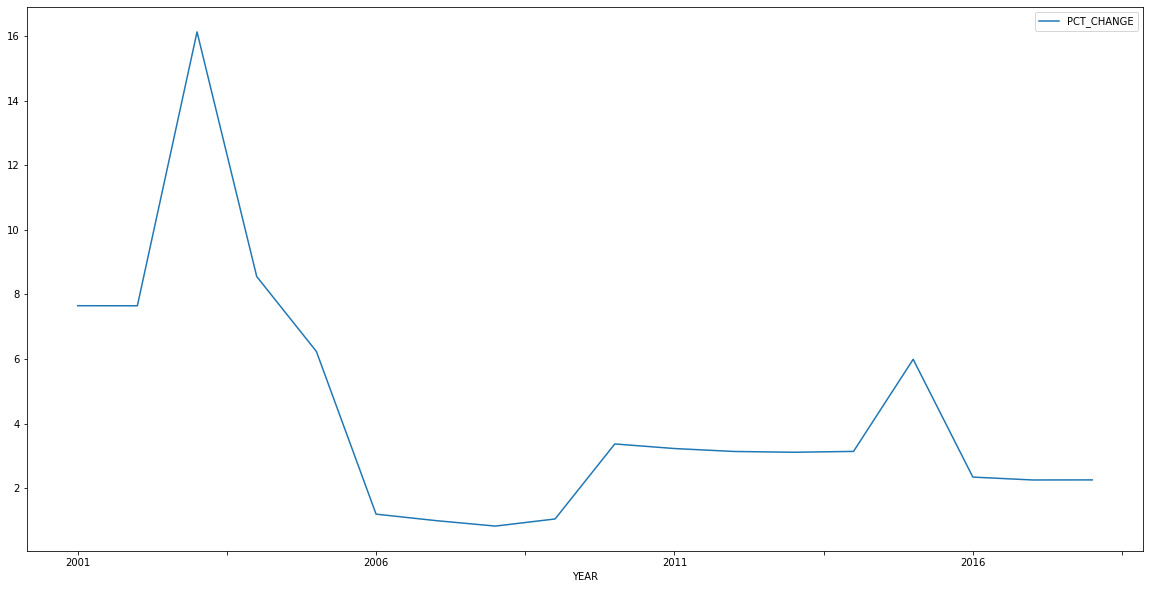

In [ ]:
ay_NEW = Select_UMBC.plot.line(x='YEAR', y='PCT_CHANGE', rot=0, figsize =(20,10))

**Since we want to do the same calculation for JHU. Instead of doing it piecemeal as we did for UMBC. Let's create a function which can be reused for any college. This function takes a list of tuitions and return a list of percentage changes year over year**

In [ ]:
def square(Tuition_List):
    result = []
    for y in Tuition_List:
      perc = 
        result.append(math.pow(y,2.0))
    return result 

# <13>
# The dataframe contains many years of data of all U.S. colleges. Let's just look at JHU.Filter/query the dataframe to retrieve only rows that belong to JHU. Save the JHU data to a new data frame. using a new variable so that the old big data frame is still available for later use.

In [23]:
Select_JHU = dfFinal[dfFinal.INSTNM == 'Johns Hopkins University']
JHU_tuition = Select_JHU['TUITIONFEE_IN'].to_list()
Percent_JHU = []
for val in range(len(JHU_tuition)):
  pc_JHU = (float((JHU_tuition[val]-JHU_tuition[val- int(1)])/JHU_tuition[val-int(1)]))*100
  pc_JHU_round = round(pc_JHU,3)
  Percent_JHU.append(pc_JHU_round)
Select_JHU['PCT_CHANGE'] = Percent_JHU
Select_JHU

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.134
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.502
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.892
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.908
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.910


# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. Let's plot bar and line chart together

In [24]:
Select_JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.134
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.502
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.892
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.908
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.910


In [29]:
import seaborn as sns

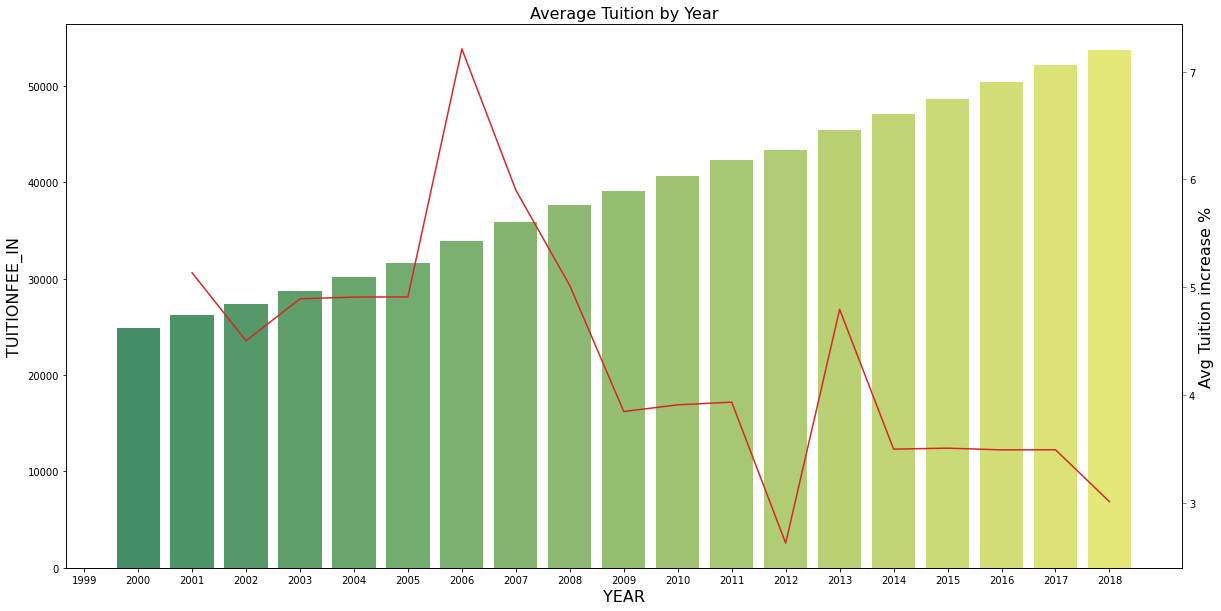

In [31]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Average Tuition by Year', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Tuition Cost', fontsize=16)
ax1 = sns.barplot(x='YEAR', y='TUITIONFEE_IN', data = Select_JHU, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Avg Tuition increase %', fontsize=16)
ax2 = sns.lineplot(x='YEAR', y='PCT_CHANGE', data = Select_JHU, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


#ax2 = Select_JHU.plot.line(x='YEAR',y='PCT_CHANGE')

# <17> 
#Make a bar plot of the JHU percentage changes tuitions over time

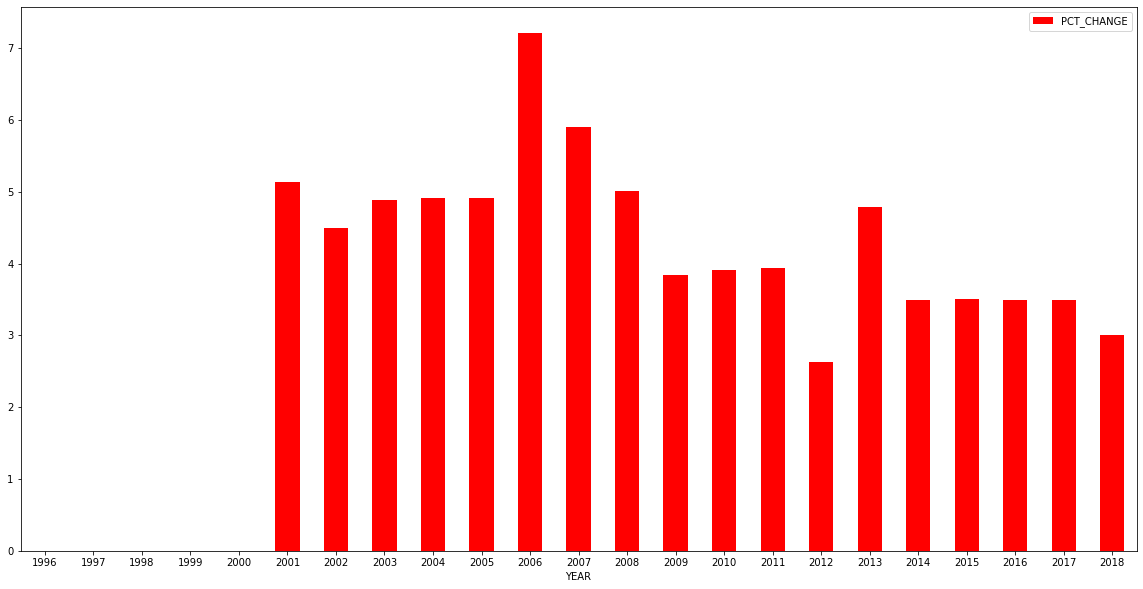

In [32]:
ax1 = Select_JHU.plot.bar(x='YEAR',y='PCT_CHANGE', rot=0, color = 'red', figsize =(20,10))

# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,we need to combine the two datasets using the common key of YEAR. First make a umbc2 dataframe with only two columns needed. WE don't need other columns. Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge. This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE".We rename them to there is no collision during the merge. 

In [33]:
UMBC2 = Select_UMBC[['YEAR', 'INSTNM', 'PCT_CHANGE']].copy()
UMBC2.rename(columns={'PCT_CHANGE':'UMBC_PCT'}, inplace = True)
UMBC2

,YEAR,INSTNM,UMBC_PCT
2151,1996,University of Maryland-Baltimore County,NaN
2049,1997,University of Maryland-Baltimore County,NaN
1982,1998,University of Maryland-Baltimore County,NaN
1955,1999,University of Maryland-Baltimore County,NaN
1926,2000,University of Maryland-Baltimore County,NaN
1915,2001,University of Maryland-Baltimore County,7.650
1893,2002,University of Maryland-Baltimore County,7.648
1873,2003,University of Maryland-Baltimore County,16.127
1830,2004,University of Maryland-Baltimore County,8.554
1819,2005,University of Maryland-Baltimore County,6.234


# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge.

In [34]:
JHU2 = Select_JHU[['YEAR', 'INSTNM', 'PCT_CHANGE']].copy()
JHU2.rename(columns={'PCT_CHANGE':'JHU_PCT'}, inplace = True)
JHU2

,YEAR,INSTNM,JHU_PCT
2139,1996,Johns Hopkins University,NaN
2039,1997,Johns Hopkins University,NaN
1973,1998,Johns Hopkins University,NaN
1946,1999,Johns Hopkins University,NaN
1917,2000,Johns Hopkins University,NaN
1906,2001,Johns Hopkins University,5.134
1884,2002,Johns Hopkins University,4.502
1865,2003,Johns Hopkins University,4.892
1823,2004,Johns Hopkins University,4.908
1812,2005,Johns Hopkins University,4.910


# Now, merger the two data frames and display the new dataframe.

In [37]:
NewDF = pd.merge(UMBC2, JHU2, on='YEAR')
NewDF = NewDF.set_index('YEAR')
NewDF

,INSTNM_x,UMBC_PCT,INSTNM_y,JHU_PCT
YEAR,,,,
1996,University of Maryland-Baltimore County,NaN,Johns Hopkins University,NaN
1997,University of Maryland-Baltimore County,NaN,Johns Hopkins University,NaN
1998,University of Maryland-Baltimore County,NaN,Johns Hopkins University,NaN
1999,University of Maryland-Baltimore County,NaN,Johns Hopkins University,NaN
2000,University of Maryland-Baltimore County,NaN,Johns Hopkins University,NaN
2001,University of Maryland-Baltimore County,7.650,Johns Hopkins University,5.134
2002,University of Maryland-Baltimore County,7.648,Johns Hopkins University,4.502
2003,University of Maryland-Baltimore County,16.127,Johns Hopkins University,4.892
2004,University of Maryland-Baltimore County,8.554,Johns Hopkins University,4.908


# Plot UMBC and JHU separately on the same plot. However, this does not work since the bars overlap.

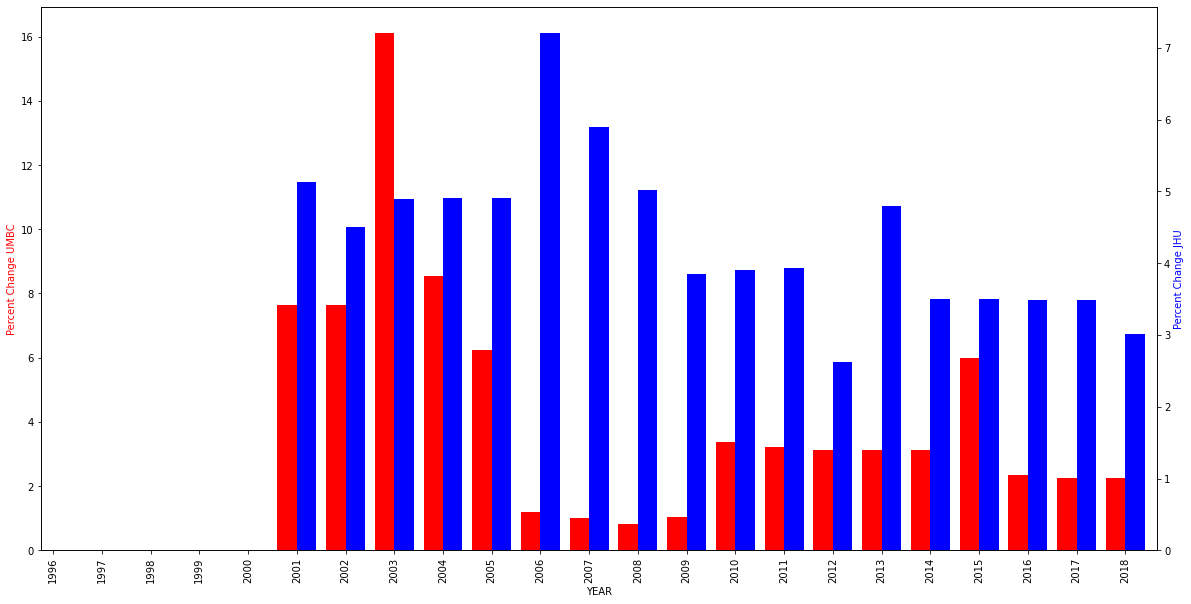

In [47]:
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

NewDF.UMBC_PCT.plot(kind='bar', color='red', ax=ax, width=width, position=1)
NewDF.JHU_PCT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Percent Change UMBC')
ax.yaxis.label.set_color('red')
ax2.set_ylabel('Percent Change JHU')
ax2.yaxis.label.set_color('blue')

plt.show()

# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot.

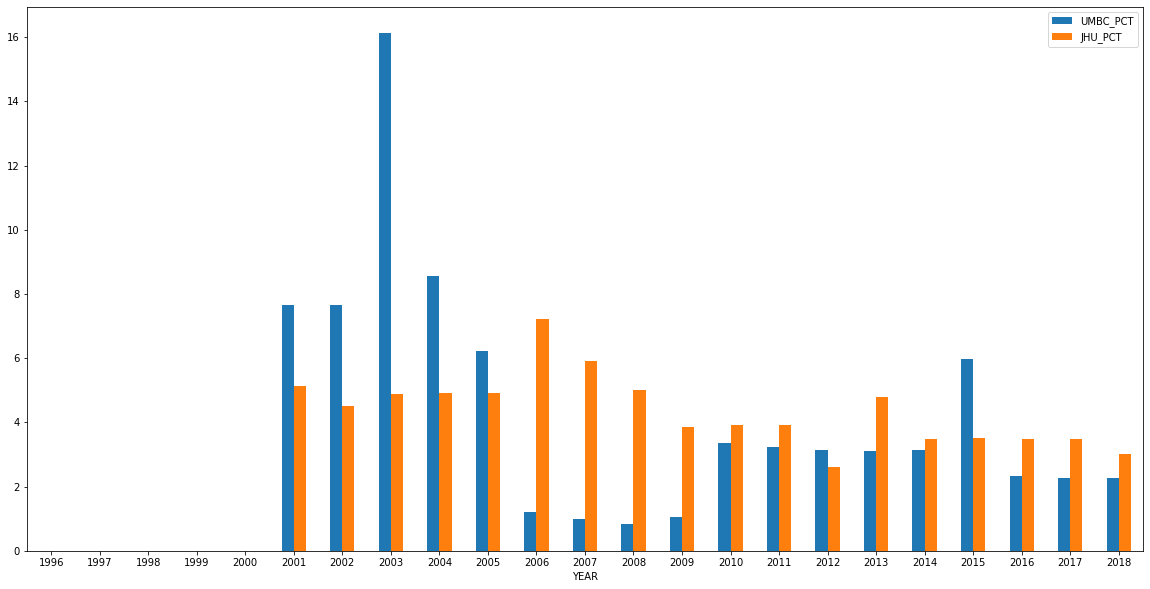

In [45]:
ax1 = NewDF.plot.bar(y=['UMBC_PCT','JHU_PCT'], rot=0, figsize =(20,10))

# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot.

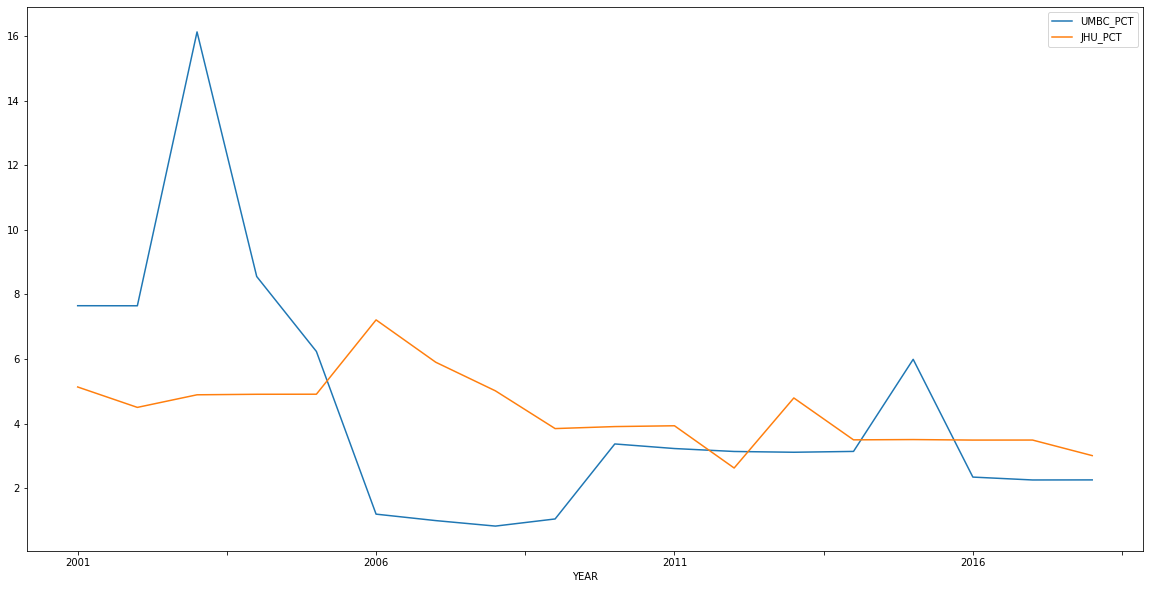

In [46]:
ax3 = NewDF.plot.line(y=['UMBC_PCT','JHU_PCT'], rot=0, figsize =(20,10))

In [ ]:
s

*Based on the plots it can be concluded that while tuition has been steadily increasing on both institutions, the pattern of increase is different. UMBC being a state institution, the increase was noticed to be fairly varying from year to year. There is a large percent increase in the year 2003 with UMBC probably corresponding with some outside factors (new construction, new accredations...) that was not noticable in case of JHU. The change in tuition with JHU ranged between 2-6% while UMBC tuition has a fairly wide change range (1-16%). We can also notice that during the economic slowdown time (2006-2009) UMBC tuition was very low as compared with the one from JHU.*

In [48]:
NewDF.describe()

,UMBC_PCT,JHU_PCT
count,18.000000,18.000000
mean,4.395278,4.365000
std,3.821919,1.113893
min,0.827000,2.625000
25%,2.255500,3.499250
50%,3.138000,4.217500
75%,6.173000,4.909500
max,16.127000,7.211000
